In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dataset_path = r'..\artifacts\data\train.csv'
data = pd.read_csv(dataset_path, index_col=0)
data.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
110770,2.01,Premium,I,SI1,62.5,59.0,8.08,8.03,5.03,15941
39658,0.71,Premium,F,SI2,61.9,60.0,5.72,5.75,3.55,2113
21888,2.04,Premium,E,SI2,60.6,58.0,8.21,8.26,4.97,18181
12716,0.37,Ideal,F,SI1,61.0,57.0,4.61,4.64,2.82,647
46017,0.33,Premium,I,VS1,60.3,59.0,4.42,4.47,2.68,521


In [40]:
data.shape

(193573, 10)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [42]:
data.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [43]:
data['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [44]:
data['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [45]:
# cat_columns_list = data.loc[:, data.dtypes == 'object'].columns.tolist()
cat_columns_list = data.select_dtypes(include=['object']).columns.tolist()
num_columns_list = data.select_dtypes(exclude=['object']).columns.tolist()

print(f"Cat columns: {cat_columns_list}")
print(f"Num columns: {num_columns_list}")

Cat columns: ['cut', 'color', 'clarity']
Num columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [46]:
for column in cat_columns_list:
    print(f"{column}: {data[column].unique()}")

cut: ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
color: ['F' 'J' 'G' 'E' 'D' 'H' 'I']
clarity: ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


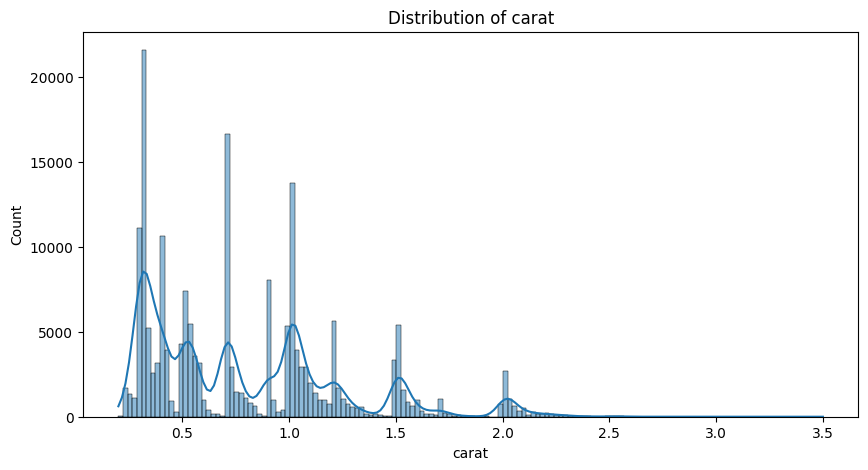

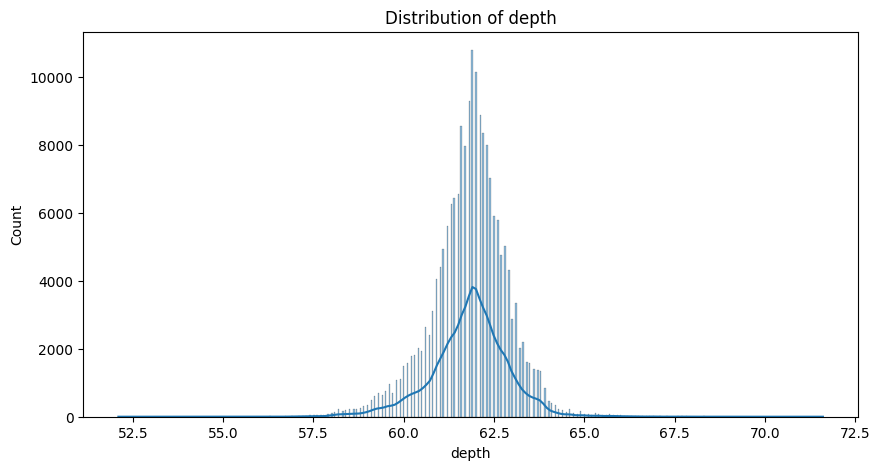

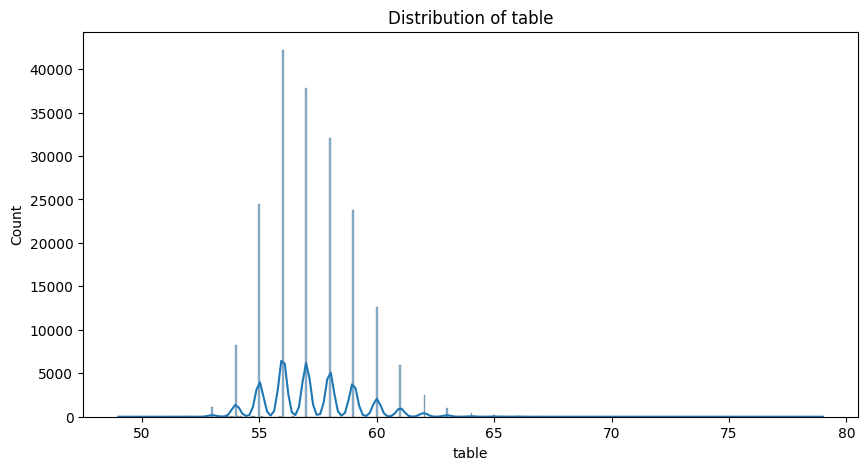

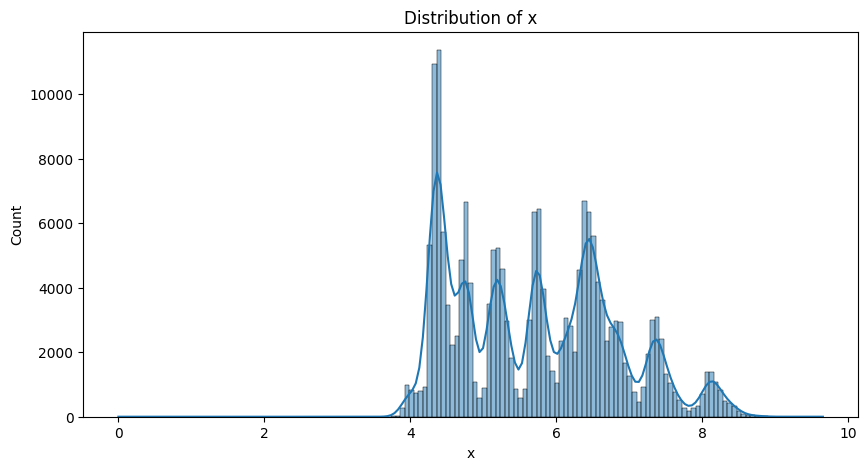

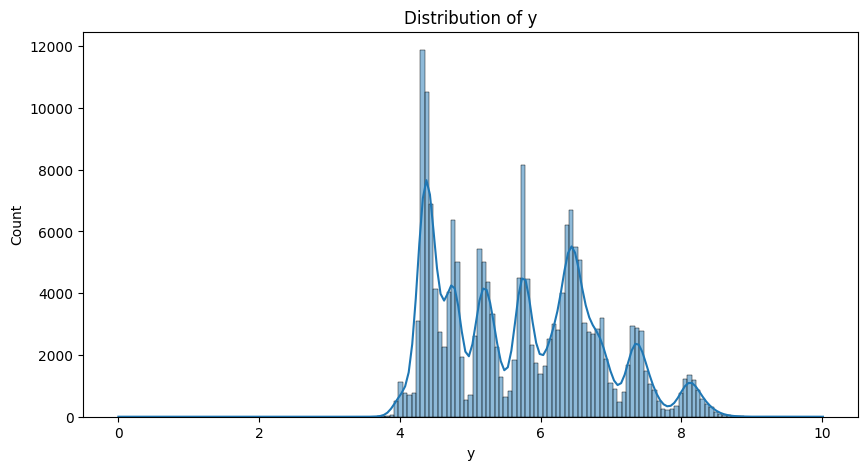

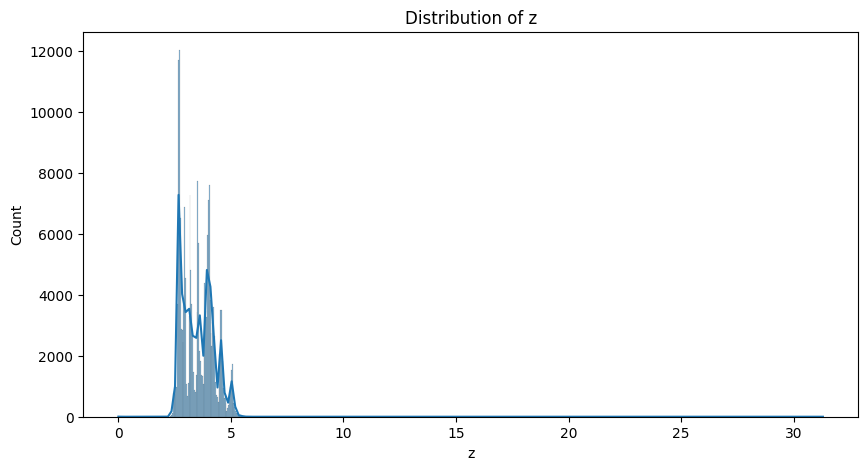

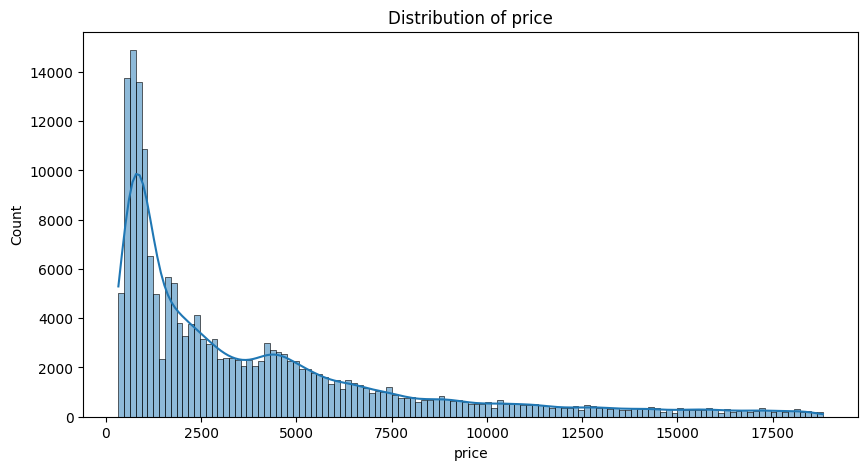

In [47]:
for num_column in num_columns_list:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[num_column], kde=True)
    plt.title(f"Distribution of {num_column}")
    plt.show()

<Axes: >

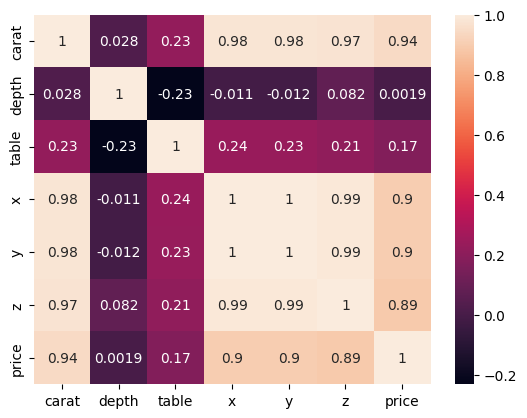

In [48]:
sns.heatmap(data[num_columns_list].corr(), annot=True)


<Axes: xlabel='cut', ylabel='price'>

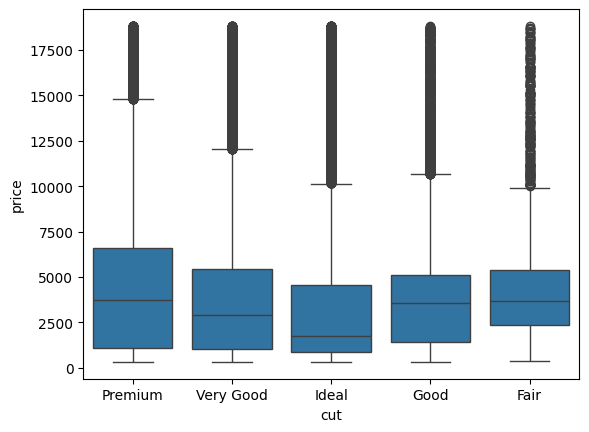

In [49]:
sns.boxplot(x=data["cut"],y=data["price"])

#### Encoding

In [30]:
# cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
# clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8} 
# color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

# data["cut"]=data["cut"].map(cut_map)
# data["clarity"]=data["clarity"].map(clarity_map)
# data["color"]=data["color"].map(color_map)

### Featurization

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

In [55]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [56]:
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

In [57]:
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
)

In [68]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_columns_list),
        ('cat', cat_pipeline, cat_columns_list)
    ]
)

In [69]:
X = data.drop('price', axis=1)
y = data['price']

cat_columns_list = X.select_dtypes(include=['object']).columns.tolist()
num_columns_list = X.select_dtypes(exclude=['object']).columns.tolist()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train=preprocessor.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=preprocessor.get_feature_names_out())
X_train.head()

,num__carat,num__depth,num__table,num__x,num__y,num__z,cat__cut,cat__color,cat__clarity
0,-1.016395,-0.204317,0.402608,-1.202472,-1.187395,-1.194148,3.0,1.0,2.0
1,0.882396,0.720758,-0.118536,0.985177,0.941823,1.036109,3.0,2.0,3.0
2,1.529711,0.350728,-1.160823,1.426308,1.394848,1.441611,4.0,5.0,3.0
3,1.896523,0.073206,0.923751,1.741402,1.711965,1.702290,3.0,5.0,1.0
4,0.450852,1.738340,1.444895,0.562052,0.525040,0.703019,1.0,4.0,3.0


In [78]:
X_test=preprocessor.transform(X_test)
X_test=pd.DataFrame(X_test,columns=preprocessor.get_feature_names_out())
X_test.head()

,num__carat,num__depth,num__table,num__x,num__y,num__z,cat__cut,cat__color,cat__clarity
0,-0.628006,0.258221,-0.118536,-0.599293,-0.580341,-0.571414,4.0,0.0,2.0
1,2.608569,-2.146973,-0.118536,2.128516,2.201232,1.962969,2.0,3.0,1.0
2,-1.124281,-1.221899,0.923751,-1.373523,-1.413907,-1.469310,3.0,1.0,6.0
3,-1.016395,-0.574346,0.923751,-1.157458,-1.160213,-1.194148,3.0,5.0,6.0
4,0.860819,0.628251,-0.639679,0.949167,0.987125,1.007145,4.0,4.0,2.0


#### Model Training

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [85]:
training_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

models =[]
r2_scores = []

In [89]:
def model_evaluation(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, mae, r2

In [91]:
for model_name, model in training_models.items():
    model.fit(X_train, y_train)
    mse, mae, r2 = model_evaluation(model, X_train, y_train)
    print(f"{model_name} - Train Metrics - MSE: {mse}, MAE: {mae}, R2: {r2}")
    mse, mae, r2 = model_evaluation(model, X_test, y_test)
    print(f"{model_name} - Test Metrics - MSE: {mse}, MAE: {mae}, R2: {r2}")
    models.append(model)
    r2_scores.append(r2)
    print("\n", "="*50, "\n")

Linear Regression - Train Metrics - MSE: 1034185.325305006, MAE: 677.1655880991771, R2: 0.9365731994779326
Linear Regression - Test Metrics - MSE: 1013245.5452810809, MAE: 671.5856392794415, R2: 0.9372975155452961


Random Forest - Train Metrics - MSE: 52328.750288661715, MAE: 115.95815432986537, R2: 0.9967906668902412
Random Forest - Test Metrics - MSE: 368941.63198550366, MAE: 309.698759234147, R2: 0.9771688540334547


Gradient Boosting - Train Metrics - MSE: 375301.5060680367, MAE: 330.64083716956696, R2: 0.9769826807840379
Gradient Boosting - Test Metrics - MSE: 385692.04691031727, MAE: 331.40634178684206, R2: 0.9761322912414203


Decision Tree - Train Metrics - MSE: 165.93665594716882, MAE: 0.8011856022937142, R2: 0.9999898230704705
Decision Tree - Test Metrics - MSE: 699019.5929269447, MAE: 422.7228550518748, R2: 0.956742701348984


XGBoost - Train Metrics - MSE: 264448.1156646455, MAE: 275.7583479049721, R2: 0.983781342211802
XGBoost - Test Metrics - MSE: 342736.69132723036, MAE

In [92]:
max_r2 = max(r2_scores)
max_r2_index = r2_scores.index(max_r2)
best_model = models[max_r2_index]
print(f"Best Model: {best_model}")
print(f"Best Model R2 Score: {max_r2}")

Best Model: LGBMRegressor()
Best Model R2 Score: 0.9793961310249113
